In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.CIFAR10("data",
                              train=True,
                              transform=ToTensor(),
                              download=True)

test_data = datasets.CIFAR10("data",
                             train=False,
                             transform=ToTensor(),
                             download=True)

100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
len(train_data), len(test_data)

(50000, 10000)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=128,
                                               shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data,
                                              batch_size=128)

In [ ]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

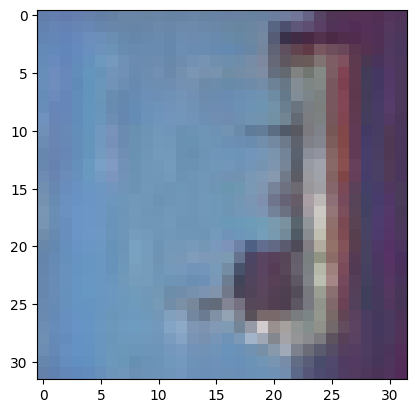

In [ ]:
plt.imshow(images[0].permute(2, 1, 0))

In [ ]:
class Resnet(nn.Module):
  def __init__(self,
               in_dim,
               out_dim,
               stride=2,
               padding=2):
    super().__init__()
    self.conv1_1 = nn.Conv2d(in_channels=in_dim,
                           out_channels=16,
                           kernel_size=3,
                           stride=stride,
                           padding=padding)
    self.batchnorm1_1 = nn.BatchNorm2d(16)
    self.relu1_1 = nn.ReLU()

    self.conv1_2 = nn.Conv2d(in_channels=16,
                             out_channels=16,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm1_2 = nn.BatchNorm2d(16)
    self.relu1_2 = nn.ReLU()

    self.conv1_3 = nn.Conv2d(in_channels=16,
                             out_channels=16,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm1_3 = nn.BatchNorm2d(16)
    self.relu1_3 = nn.ReLU()

    self.conv1_4 = nn.Conv2d(in_channels=16,
                             out_channels=16,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm1_4 = nn.BatchNorm2d(16)
    self.relu1_4 = nn.ReLU()

    self.conv2_1 = nn.Conv2d(in_channels=16,
                             out_channels=32,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm2_1 = nn.BatchNorm2d(32)
    self.relu2_1 = nn.ReLU()

    self.conv2_2 = nn.Conv2d(in_channels=32,
                             out_channels=32,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm2_2 = nn.BatchNorm2d(32)
    self.relu2_2 = nn.ReLU()

    self.conv2_3 = nn.Conv2d(in_channels=32,
                             out_channels=32,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm2_3 = nn.BatchNorm2d(32)
    self.relu2_3 = nn.ReLU()

    self.conv3_1 = nn.Conv2d(in_channels=32,
                             out_channels=64,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm3_1 = nn.BatchNorm2d(64)
    self.relu3_1 = nn.ReLU()

    self.conv3_2 = nn.Conv2d(in_channels=64,
                             out_channels=64,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm3_2 = nn.BatchNorm2d(64)
    self.relu3_2 = nn.ReLU()

    self.conv3_3 = nn.Conv2d(in_channels=64,
                             out_channels=64,
                             kernel_size=3,
                             stride=stride,
                             padding=padding)
    self.batchnorm3_3 = nn.BatchNorm2d(64)
    self.relu3_3 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(2)
    self.maxpool2 = nn.MaxPool2d(2)
    self.pad1 = nn.ZeroPad1d((0, 0, 0, 0, 16, 0))
    self.pad2 = nn.ZeroPad1d((0, 0, 0, 0, 32, 0))
    self.global_av = nn.AvgPool2d(8)
    self.flatten = nn.Flatten()
    self.clf = nn.Linear(in_features=4096,
                         out_features=10)

  def forward(self, x):
    x = self.conv1_1(x)
    x = self.batchnorm1_1(x)
    x = self.relu1_1(x)
    x_clone = x
    x = self.conv1_2(x)
    x = self.batchnorm1_2(x)
    x = self.relu1_2(x)
    x = self.conv1_3(x)
    x = self.batchnorm1_3(x)
    x = self.relu1_3(x)
    x = self.conv1_4(x)


    x = x + x_clone
    x = self.batchnorm1_4(x)
    x = self.relu1_4(x)
    x = self.maxpool1(x)

    x_clone = self.pad1(x)
    x = self.conv2_1(x)
    x = self.batchnorm2_1(x)
    x = self.relu2_1(x)

    x = self.conv2_2(x)
    x = self.batchnorm2_2(x)
    x = self.relu2_2(x)

    x = self.conv2_3(x)
    x = x + x_clone
    x = self.batchnorm2_3(x)
    x = self.relu2_3(x)
    x = self.maxpool2(x)

    x_clone = self.pad2(x)
    x = self.conv3_1(x)
    x = self.batchnorm3_1(x)
    x = self.relu3_1(x)

    x = self.conv3_2(x)
    x = self.batchnorm3_2(x)
    x = self.relu3_1(x)

    x = self.conv3_3(x)
    x = x + x_clone
    x = self.batchnorm3_3(x)
    x = self.relu3_3(x)



    # x = self.global_av(x)
    x = self.flatten(x)
    x = self.clf(x)
    return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Resnet(in_dim=3,
               out_dim=10,
               stride=1,
               padding=1).to(device)

In [ ]:
model(images.to(device)).shape

torch.Size([128, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.0001)

In [ ]:
epochs = 100

train_loss_hist = []
test_loss_hist = []
for epoch in range(epochs):
  train_loss, test_loss = 0, 0
  model.train()
  for X, y in train_dataloader:
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)

  with torch.inference_mode():
    model.eval()
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      test_loss += loss
    test_loss /= len(test_dataloader)
  test_loss_hist.append(test_loss)
  train_loss_hist.append(train_loss)
  print(f"epoch{epoch}: train loss={train_loss}, test loss={test_loss}")


epoch0: train loss=1.4314932823181152, test loss=1.8118319511413574
epoch1: train loss=1.0385794639587402, test loss=1.0921916961669922
epoch2: train loss=0.8751199841499329, test loss=0.9270093441009521
epoch3: train loss=0.7673439979553223, test loss=0.9196693301200867
epoch4: train loss=0.6860793828964233, test loss=0.8454892039299011
epoch5: train loss=0.6199255585670471, test loss=0.8257359862327576
epoch6: train loss=0.5652297735214233, test loss=0.8317959308624268
epoch7: train loss=0.5157951712608337, test loss=0.7547042965888977
epoch8: train loss=0.46778833866119385, test loss=0.7799339294433594
epoch9: train loss=0.42914995551109314, test loss=0.7555128335952759
epoch10: train loss=0.39256611466407776, test loss=0.7593367099761963
epoch11: train loss=0.3553105890750885, test loss=0.8027235269546509
epoch12: train loss=0.3235887587070465, test loss=0.7598435282707214
epoch13: train loss=0.29334622621536255, test loss=0.9267286658287048
epoch14: train loss=0.2640846073627472, 

KeyboardInterrupt: 

In [ ]:
for i in range(len(train_loss_hist)):
  train_loss_hist[i] = train_loss_hist[i].detach().item()

In [ ]:
for i in range(len(test_loss_hist)):
  test_loss_hist[i] = test_loss_hist[i].detach().item()

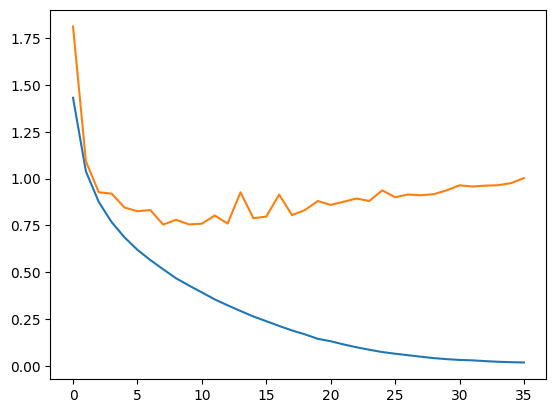

In [ ]:
plt.plot(train_loss_hist)
plt.plot(test_loss_hist)